In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
paths = []

for dirname, _, filenames in os.walk('../raw_data/'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
paths

['../data/event_popularity_benchmark_private_test_only.csv',
 '../data/random_benchmark.csv',
 '../data/users.csv',
 '../data/user_friends.csv',
 '../data/event_popularity_benchmark.csv',
 '../data/events.csv',
 '../data/test.csv',
 '../data/public_leaderboard_solution.csv',
 '../data/event_attendees.csv',
 '../data/train.csv']

In [3]:
dataframes = [pd.read_csv(path) for path in paths]
_, _, users_df, user_friends_df, _, events_df, test_df, _, event_attendees_df, train_df = dataframes

### Visuliasation

##### USERS DATAFRAME

/tmp/ipykernel_50136/2500937532.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=users_df['locale'].value_counts().index[:15], y=users_df['locale'].value_counts().values[:15], palette='viridis')


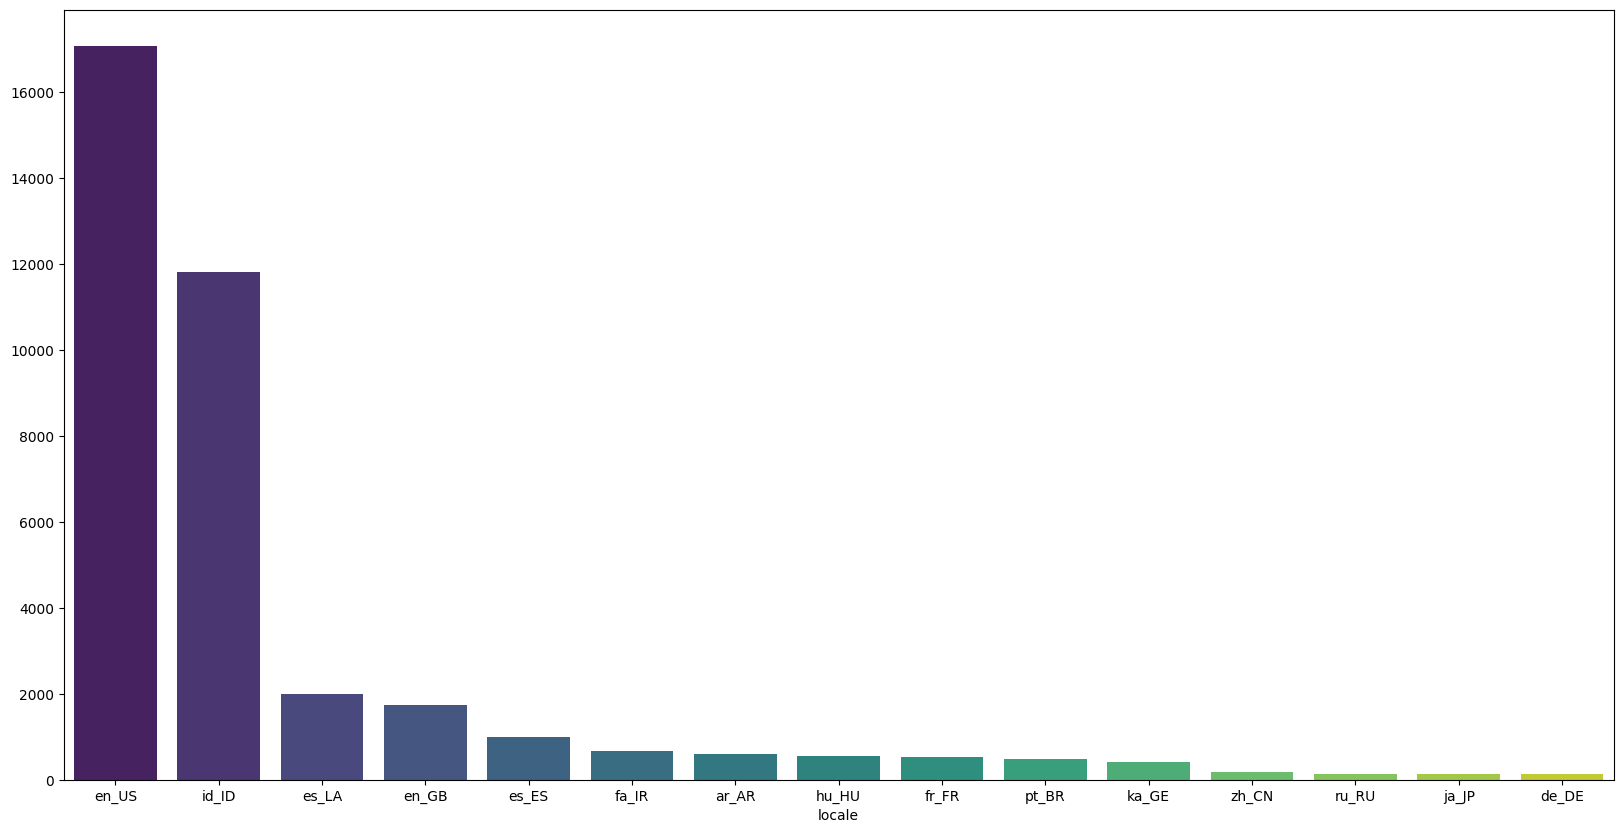

In [4]:
plt.figure(figsize=(20, 10))
sns.barplot(x=users_df['locale'].value_counts().index[:15], y=users_df['locale'].value_counts().values[:15], palette='viridis')
plt.show()

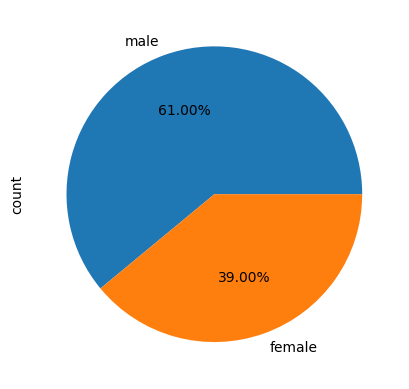

In [5]:
users_df['gender'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.show()

In [6]:
def age_calculator(birthyear):
    return 2015 - birthyear


0        1993
1        1992
2        1975
3        1991
4        1995
         ... 
38204    1966
38205    1997
38206    1995
38207    1989
38208    1980
Name: birthyear, Length: 38209, dtype: object

In [7]:

users_df['birthyear'] = pd.to_numeric(users_df['birthyear'], errors='coerce')
users_df.fillna({'birthyear': users_df['birthyear'].mean()}, inplace=True)
users_df = users_df[users_df['birthyear'] >= 1975]
users_df['birthyear'] = users_df['birthyear'].astype(int)
users_df['birthyear'].min()

/tmp/ipykernel_50136/155250538.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_df['birthyear'] = users_df['birthyear'].astype(int)


1975

In [8]:
users_df['age'] = users_df['birthyear'].apply(age_calculator)


/tmp/ipykernel_50136/2931972589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_df['age'] = users_df['birthyear'].apply(age_calculator)


<Axes: xlabel='age', ylabel='Count'>

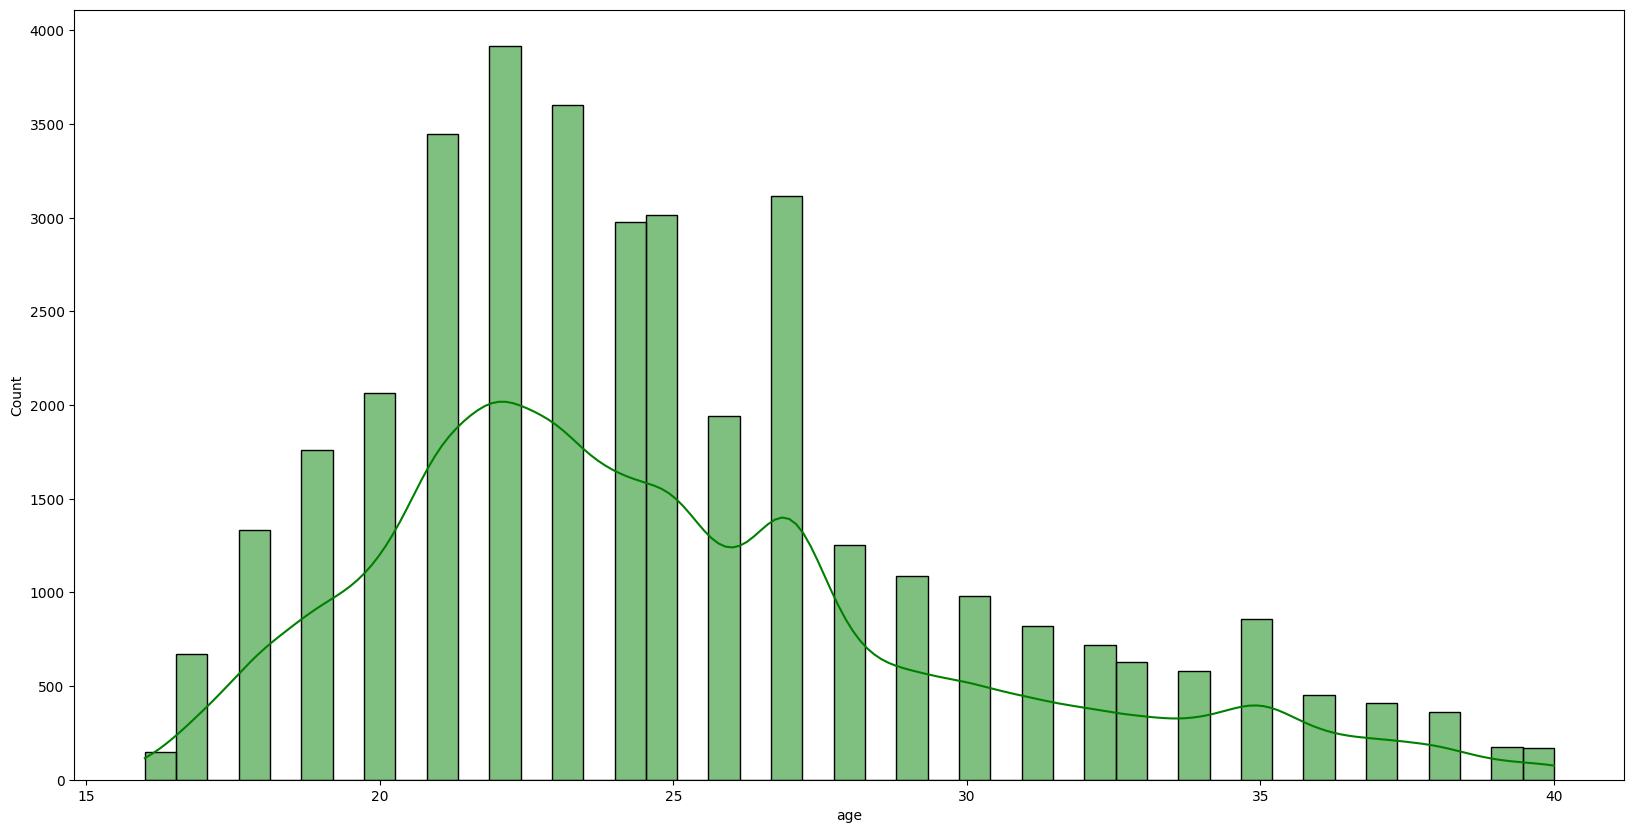

In [9]:
plt.figure(figsize=(20, 10))
sns.histplot(users_df['age'], bins=45, kde=True, color='green')

##### EVENTS DATAFRAME

In [16]:
events_df.head()
users_interaction_matrix = pd.DataFrame(events_df.groupby('user_id').count()['event_id'].sort_values(ascending=False))

In [25]:
users_interaction_matrix.merge(users_df, left_index=True, right_on='user_id', how='inner')

,event_id,user_id,locale,birthyear,gender,joinedAt,location,timezone,age
36792,36,3934954183,en_US,1990,female,2012-08-28T02:37:05.534Z,NaN,-240.0,25
11377,23,988042755,en_US,1984,male,2012-08-28T18:44:56.899Z,NaN,-300.0,31
33331,21,2497128027,en_US,1977,male,2012-11-23T18:34:01.920Z,Los Angeles California,-480.0,38
21958,20,2046112284,en_US,1988,male,2012-10-02T02:59:06.088Z,Hollywood California,-420.0,27
5168,19,644092548,en_US,1986,male,2012-10-18T18:21:01.533Z,Tustin California,-480.0,29
...,...,...,...,...,...,...,...,...,...
1539,1,1813955017,en_US,1980,NaN,2012-06-02T23:02:26.013Z,NaN,-240.0,35
25597,1,1803898257,en_US,1982,female,2012-06-30T23:53:37.524Z,NaN,-240.0,33
26237,1,1828838057,en_US,1988,male,2012-05-23T22:26:50.318Z,NaN,-240.0,27
31941,1,1776377005,en_US,1993,male,2012-09-18T19:11:26.561Z,Tempe Arizona,-420.0,22


In [30]:

event_attendees_df.merge(events_df, on='event_id', how='inner')

,event,yes,maybe,invited,no,event_id,user_id,start_time,city,state,...,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99,c_100,c_other
0,1159822043,1975964455 252302513 4226086795 3805886383 142...,2733420590 517546982 1350834692 532087573 5831...,1723091036 3795873583 4109144917 3560622906 31...,3575574655 1077296663,1159822043,1288646033,2012-12-16T09:00:00.003Z,NaN,NaN,...,0,0,0,0,0,0,1,3,0,78
1,686467261,2394228942 2686116898 1056558062 3792942231 41...,1498184352 645689144 3770076778 331335845 4239...,1788073374 733302094 1830571649 676508092 7081...,NaN,686467261,3738415639,2012-11-23T03:00:00.003Z,NaN,NaN,...,0,0,1,0,0,1,0,0,0,102
2,1186208412,NaN,3320380166 3810793697,1379121209 440668682,1728988561 2950720854,1186208412,553345821,2012-08-08T12:00:00.000Z,Toronto,ON,...,1,1,0,0,1,0,0,0,0,93
3,2621578336,NaN,NaN,NaN,NaN,2621578336,4254887505,2012-06-21T22:00:00.000Z,London,ON,...,0,0,0,0,0,0,0,0,0,59
4,855842686,2406118796 3550897984 294255260 1125817077 109...,2671721559 1761448345 2356975806 2666669465 10...,1518670705 880919237 2326414227 2673818347 332...,3500235232,855842686,3160065230,2012-12-14T04:00:00.003Z,Kamloops,BC,...,0,0,0,2,0,2,0,0,0,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23859,110980591,NaN,919719690 563897585 1660054065,4240518642 1600401182 1069815686 575688453 168...,NaN,110980591,1335694173,2012-10-31T07:00:00.003Z,NaN,NaN,...,0,0,1,0,0,0,0,0,0,17
23860,582973300,2764820512 57535535 3852680355 1552352413 1922...,1750292668,4268940236 843418792 2432405737 496887289 2317...,3895101160,582973300,183886842,2012-12-13T01:30:00.003Z,Los Angeles,CA,...,0,0,0,0,0,0,0,0,0,21
23861,1294481466,4197808605 2109654543 1411365919 3312623074 28...,1815047818 307909158 3928453636 3425034044 489...,3652885869 1402077635 4094813681 1481916408 94...,3521355909,1294481466,2761295488,2012-11-02T21:00:00.003Z,NaN,NaN,...,0,0,0,0,0,0,0,0,0,63
23862,2252745757,4012700558 2635142372 3548253433 1798138792 14...,4019333154 1446807128 944051059 2911518312 312...,159045750 2069126466 4038356536 2710894917 224...,NaN,2252745757,1937455536,2012-10-31T19:00:00.003Z,NaN,NaN,...,0,0,0,0,0,0,0,0,0,38
